# CHLOE WOHLGEMUTH
Astronomy 200: Data Science with Astronomy
Spring 2019
Professor Follette

In [1]:
import numpy as np #for mathematical operations and statistics
%matplotlib inline 
    #make things look and visuals work right
import matplotlib.pyplot as plt #for visualizations and graphics of data
plt.style.use('seaborn-white') #have matplotlub use some of the style of seaborn in plots
import scipy.stats as stats #for statistical calculations
import seaborn as sbn #for visualizations and graphics of data
import pandas as pd #read and tabulize data
from IPython.display import Markdown, display #allow for markdown text --> weighted/font styles for printed statements and formatting
sbn.set(style="white", color_codes=True) #color style for seaborn plots

#### Reading in the data

In [2]:
data=pd.read_csv('jpl.csv') #reads data from csv as a table (rows and columns)
#data #displaying the dataframe

#### Plotting Histograms, Scatterplots, Boxplots of the Orbital Properties

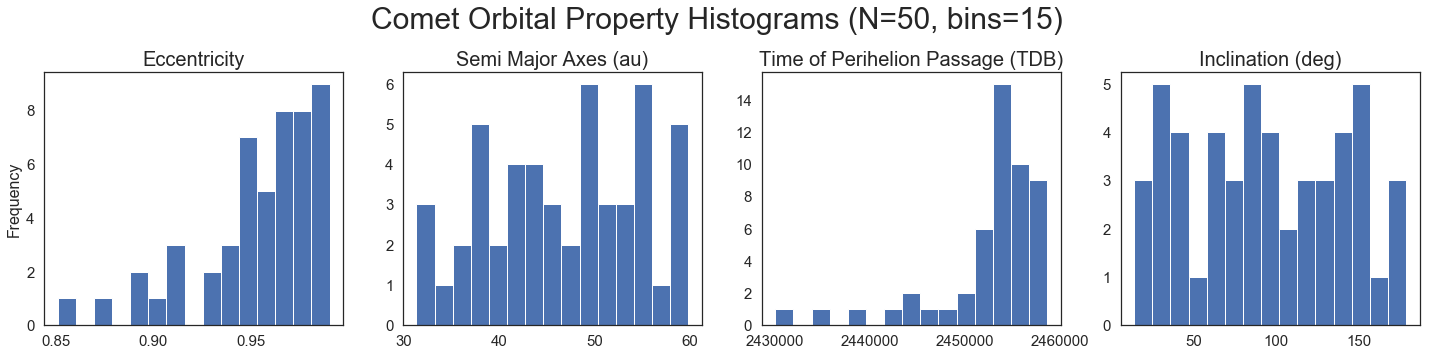

In [3]:
#Setting up the panels/layout for sub-plots so histograms are adjacent
fig1, axs1 = plt.subplots(1,4,figsize=(20,5),sharex=False,sharey=False) 
fig1.suptitle("Comet Orbital Property Histograms (N=50, bins=15)",fontsize=30, ha='center') #overall title
axs1[0].set_ylabel("Frequency",fontsize=16) #y axis label
#Arrays of column (properties) and axis label (labels1) names, so can use for loop to plot
properties1= ['eccentricity','semi-major axis (au)','TP (TDB)','inclination (deg)']
labels1 = ["Eccentricity","Semi Major Axes (au)","Time of Perihelion Passage (TDB)","Inclination (deg)"]
#generate histograms for each of the properties
for i in range(0,4): #indices 0-3 for the four histograms to be displayed
    #making the histogram and assigning to corresponding subplot position and labeling index "i"
    axs1[i].hist(data[properties1[i]],bins=15)
    #titling each histogram - identifies which distirbution is which property
    axs1[i].set_title(labels1[i],fontsize=20, ha='center')
    #enlargening/formatting the axis markers/values so clear and legible
    axs1[i].tick_params(labelsize=15)
fig1.tight_layout() #prevent overlaps of subplots data and labels
fig1.subplots_adjust(top=0.8) #so that title does not overlap over subplots
fig1.subplots_adjust(wspace=0.2, hspace=0.18) #add spacing between plots to make clearer

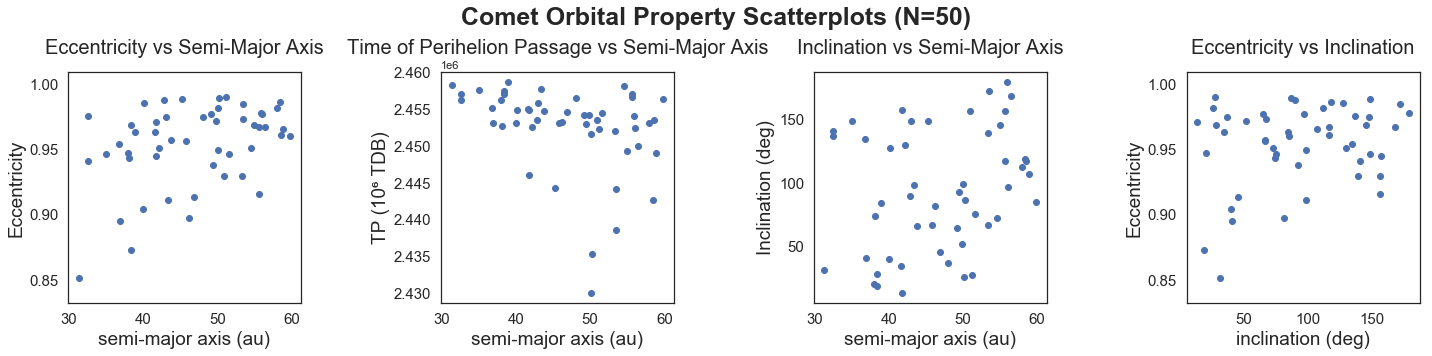

In [4]:
#Setting up the panels/layout for sub-plots so histograms are adjacent
fig2,axs2 = plt.subplots(1, 4,figsize=(20,5),sharex=False,sharey=False)
fig2.suptitle("Comet Orbital Property Scatterplots (N=50)",fontsize=25, fontweight='bold', ha='center') #main title

#Arrays of data locations/names and labels, so can use loop for plots
xProp = ['semi-major axis (au)','semi-major axis (au)','semi-major axis (au)','inclination (deg)']
yProp = ['eccentricity','TP (TDB)','inclination (deg)','eccentricity']
titles = ["Eccentricity vs Semi-Major Axis","Time of Perihelion Passage vs Semi-Major Axis","Inclination vs Semi-Major Axis",'Eccentricity vs Inclination']
yLab = ["Eccentricity","TP (10\u2076 TDB)".format(),"Inclination (deg)","Eccentricity"]

for i in range(0,4): #indices 0-3 for the four scatterplots to be displayed
    #making the scatterplot and assigning to corresponding subplot position and labeling index "i"
    axs2[i].scatter(x=data[xProp[i]], y=data[yProp[i]])
    axs2[i].set_title(titles[i],fontsize=20,y=1.05) #titling each plot
    axs2[i].set_xlabel(xProp[i], fontsize=19) #x-axis label
    axs2[i].set_ylabel(yLab[i],fontsize=19) #y-axis label
    #enlargening/formatting the axis markers/values so clear and legible
    axs2[i].tick_params(labelsize=15)
    axs2[i].ticklabel_format(axis='y', style='sci', scilimits=(-3,3)) #Make TP axis be in scientific notation
fig2.tight_layout() #prevent overlaps of subplots data and labels
fig2.subplots_adjust(top=0.8) #so that title does not overlap over subplots
fig2.subplots_adjust(wspace=0.6, hspace=0.25)

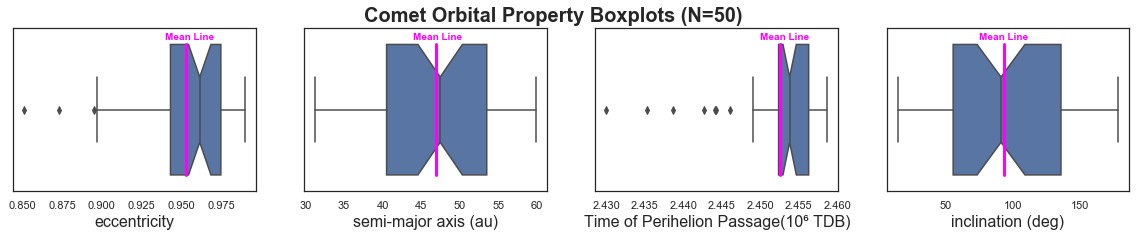

eccentricity: 
	
count    50.000000
mean      0.953343
std       0.031148
min       0.851089
25%       0.943258
50%       0.961706
75%       0.975023
max       0.990098
Name: eccentricity, dtype: float64
semi-major axis (au): 
	
count    50.000000
mean     46.906745
std       7.942846
min      31.311865
25%      40.529667
50%      47.460596
75%      53.489917
max      59.850612
Name: semi-major axis (au), dtype: float64
TP (TDB): 
	
count    5.000000e+01
mean     2.452536e+06
std      5.872141e+03
min      2.430015e+06
25%      2.452390e+06
50%      2.453828e+06
75%      2.456303e+06
max      2.458691e+06
Name: TP (TDB), dtype: float64
inclination (deg): 
	
count     50.000000
mean      93.507396
std       47.309320
min       13.881200
25%       55.364156
50%       91.119610
75%      135.895465
max      178.618008
Name: inclination (deg), dtype: float64


In [5]:
fig4 = plt.figure(figsize = (20,3)) # width x height
fig4.suptitle("Comet Orbital Property Boxplots (N=50)",fontsize=20,fontweight='bold') #main title
#instantiating each of the subplots:
ax4_1 = fig4.add_subplot(1,4,1)
ax4_2 = fig4.add_subplot(1,4,2)
ax4_3 = fig4.add_subplot(1,4,3)
ax4_4 = fig4.add_subplot(1,4,4)
#initializing the subplots with the boxplots for the variables
bp_props1 = sbn.boxplot(x=data[properties1[0]], notch=True, ax=ax4_1,showmeans=True,
            meanline=True,meanprops=(dict(linestyle='-', linewidth=3, color='fuchsia')))
bp_props2 = sbn.boxplot(x=data[properties1[1]], notch=True, ax=ax4_2,showmeans=True,
            meanline=True,meanprops=(dict(linestyle='-', linewidth=3, color='fuchsia')))
bp_props3 = sbn.boxplot(x=(data[properties1[2]])/1000000, notch=True, ax=ax4_3,
            showmeans=True,meanline=True,meanprops=(dict(linestyle='-', linewidth=3, color='fuchsia')))
bp_props4 = sbn.boxplot(x=data[properties1[3]], notch=True, ax=ax4_4,showmeans=True,
            meanline=True,meanprops=(dict(linestyle='-', linewidth=3, color='fuchsia')))
#formatting the labels so they are legible
bp_props1.set_xlabel(properties1[0],fontsize=16)
bp_props2.set_xlabel(properties1[1],fontsize=16)
bp_props4.set_xlabel(properties1[3],fontsize=16)
bp_props3.set_xlabel("Time of Perihelion Passage(10\u2076 TDB)".format(),fontsize=16)
#labeling the mean lines
ax4_1.text(x=.94,y=-.43,s="Mean Line",fontdict=(dict(color='fuchsia', weight='bold', size=10)))
ax4_2.text(x=44,y=-.43,s="Mean Line",fontdict=(dict(color='fuchsia', weight='bold', size=10)))
ax4_3.text(x=2.45,y=-.43,s="Mean Line",fontdict=(dict(color='fuchsia', weight='bold', size=10)))
ax4_4.text(x=75,y=-.43,s="Mean Line",fontdict=(dict(color='fuchsia', weight='bold', size=10)))


#display the boxplots
plt.show(fig4)
#print out descriptive statistics for each
for i in range(0,4):
    print(str(properties1[i])+": \n\t")
    print(data[properties1[i]].describe())

### Testing Different Log Scalings
Plotting scatterplots in different spaces to see if log scaling provides any other insight

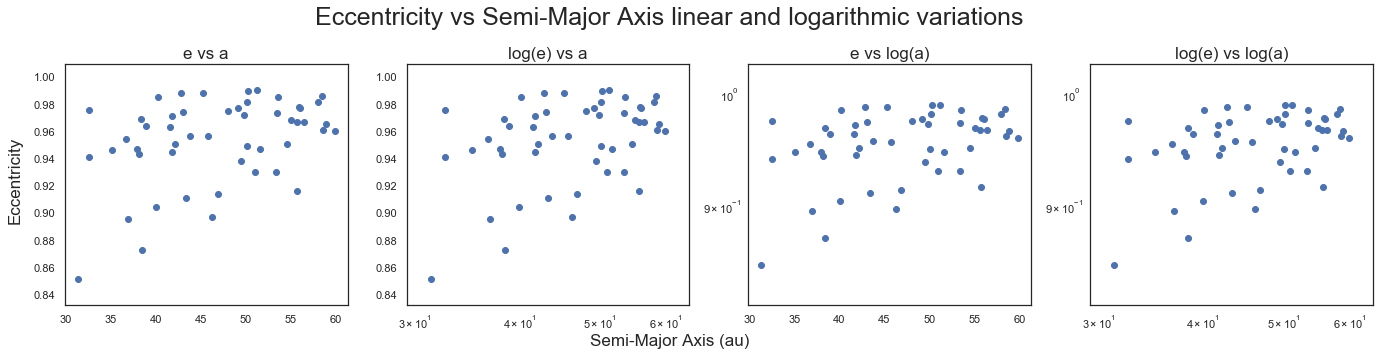

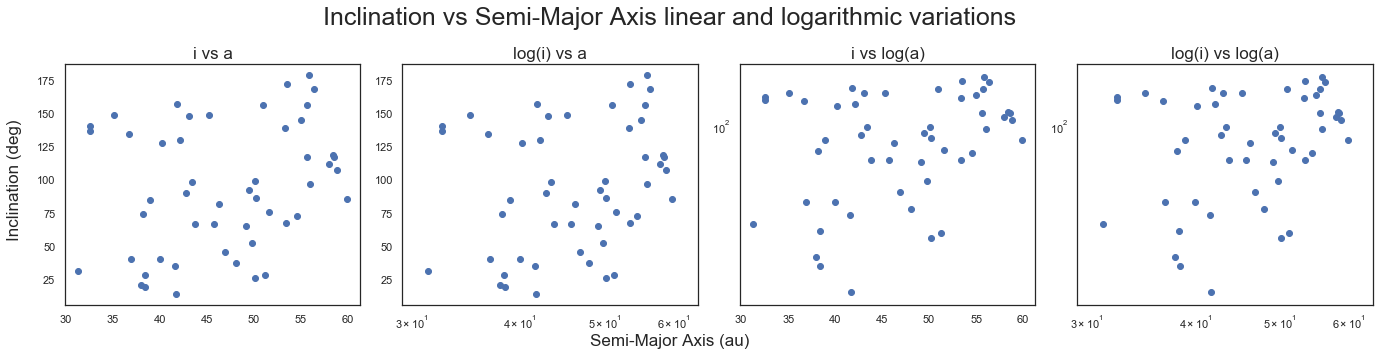

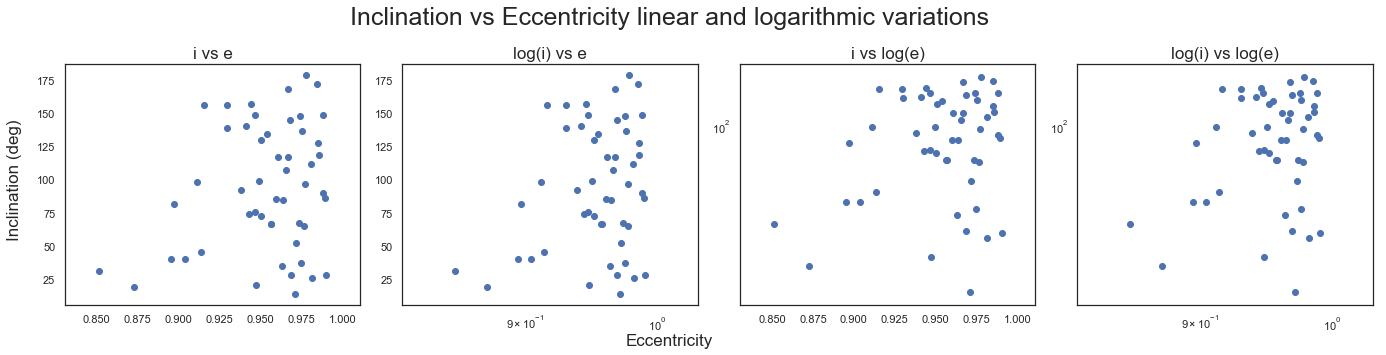

In [6]:
#Eccentricity vs Semi-Major Axis linear and logarithmic variations
fig3,axs3 = plt.subplots(nrows=1, ncols=4,figsize=(20,5),sharex=False,sharey=False)
fig3.suptitle("Eccentricity vs Semi-Major Axis linear and logarithmic variations",fontsize=25, ha='center') #main title
#axis labels for Eccentricity vs Semi-Major Axis
fig3.text(0.5, 0.04, "Semi-Major Axis (au)", fontsize=17,ha='center')
fig3.text(0.04, 0.5, "Eccentricity",fontsize=17, va='center', rotation='vertical')
#setting log scales for Eccentricity vs Semi-Major Axis plots
axs3[1].set_xscale('log')
axs3[2].set_yscale('log')
axs3[3].set_xscale('log')
axs3[3].set_yscale('log')
#scatterplots for Eccentricity vs Semi-Major Axis
axs3[0].scatter(x=data['semi-major axis (au)'],y=data['eccentricity'])
axs3[1].scatter(x=data['semi-major axis (au)'],y=data['eccentricity'])
axs3[2].scatter(x=data['semi-major axis (au)'],y=data['eccentricity'])
axs3[3].scatter(x=data['semi-major axis (au)'],y=data['eccentricity'])
#titles for Eccentricity vs Semi-Major Axis
axs3[0].set_title("e vs a",fontsize=17)
axs3[1].set_title("log(e) vs a",fontsize=17)
axs3[2].set_title("e vs log(a)",fontsize=17)
axs3[3].set_title("log(e) vs log(a)",fontsize=17)
#formatting for Eccentricity vs Semi-Major Axis
fig3.tight_layout() #prevent overlaps of subplots data and labels
fig3.subplots_adjust(left=0.08,top=0.82, bottom=0.15) #so that title does not overlap over subplots
plt.show() #plotting Eccentricity vs Semi-Major Axis plots

#Inclination vs Semi-Major Axis linear and logarithmic variations
fi3,ax3 = plt.subplots(nrows=1, ncols=4,figsize=(20,5),sharex=False,sharey=False)
fi3.suptitle("Inclination vs Semi-Major Axis linear and logarithmic variations",fontsize=25, ha='center') #main title
#axis labels for Inclination vs Semi-Major Axis
fi3.text(0.5, 0.04, "Semi-Major Axis (au)", fontsize=17,ha='center')
fi3.text(0.04, 0.5, "Inclination (deg)",fontsize=17, va='center', rotation='vertical')
#setting log scales for Inclination vs Semi-Major Axis plots
ax3[1].set_xscale('log')
ax3[2].set_yscale('log')
ax3[3].set_xscale('log')
ax3[3].set_yscale('log')
#scatterpplots for Inclination vs Semi-Major Axis
ax3[0].scatter(x=data['semi-major axis (au)'],y=data['inclination (deg)'])
ax3[1].scatter(x=data['semi-major axis (au)'],y=data['inclination (deg)'])
ax3[2].scatter(x=data['semi-major axis (au)'],y=data['inclination (deg)'])
ax3[3].scatter(x=data['semi-major axis (au)'],y=data['inclination (deg)'])
#titles for Inclination vs Semi-Major Axis
ax3[0].set_title("i vs a",fontsize=17)
ax3[1].set_title("log(i) vs a",fontsize=17)
ax3[2].set_title("i vs log(a)",fontsize=17)
ax3[3].set_title("log(i) vs log(a)",fontsize=17)
#formatting for Inclination vs Semi-Major Axis
fi3.tight_layout() #prevent overlaps of subplots data and labels
fi3.subplots_adjust(left=0.08,top=0.82, bottom=0.15) #so that title does not overlap over subplots
plt.show()

#Inclination vs Eccentricity linear and logarithmic variations
f3,a3 = plt.subplots(nrows=1, ncols=4,figsize=(20,5),sharex=False,sharey=False)
f3.suptitle("Inclination vs Eccentricity linear and logarithmic variations",fontsize=25, ha='center') #main title
#axis labels for Inclination vs Eccentricity
f3.text(0.5, 0.04, "Eccentricity", fontsize=17,ha='center')
f3.text(0.04, 0.5, "Inclination (deg)",fontsize=17, va='center', rotation='vertical')
#setting log scales for Inclination vs Eccentricity plots
a3[1].set_xscale('log')
a3[2].set_yscale('log')
a3[3].set_xscale('log')
a3[3].set_yscale('log')
#scatterplots for Inclination vs Eccentricity
a3[0].scatter(x=data['eccentricity'],y=data['inclination (deg)'])
a3[1].scatter(x=data['eccentricity'],y=data['inclination (deg)'])
a3[2].scatter(x=data['eccentricity'],y=data['inclination (deg)'])
a3[3].scatter(x=data['eccentricity'],y=data['inclination (deg)'])
#titles for Inclination vs Eccentricity
a3[0].set_title("i vs e",fontsize=17)
a3[1].set_title("log(i) vs e",fontsize=17)
a3[2].set_title("i vs log(e)",fontsize=17)
a3[3].set_title("log(i) vs log(e)",fontsize=17)
#formatting for Inclination vs Eccentricity
f3.tight_layout() #prevent overlaps of subplots data and labels
f3.subplots_adjust(left=0.08,top=0.82, bottom=0.15) #so that title does not overlap over subplots
plt.show() #plotting Inclination vs Eccentricity plots

#### Thoughts:
Log scaling did not provide any new or improved insight. None of the log-linear, linear-log, or log-log spaces produced a more clear trend than lin-lin space does. Therefore, I stick to lin-lin space.

# Short vs Long Period Comparisons

#### Boxplots comparing each property distribution between short and long periods

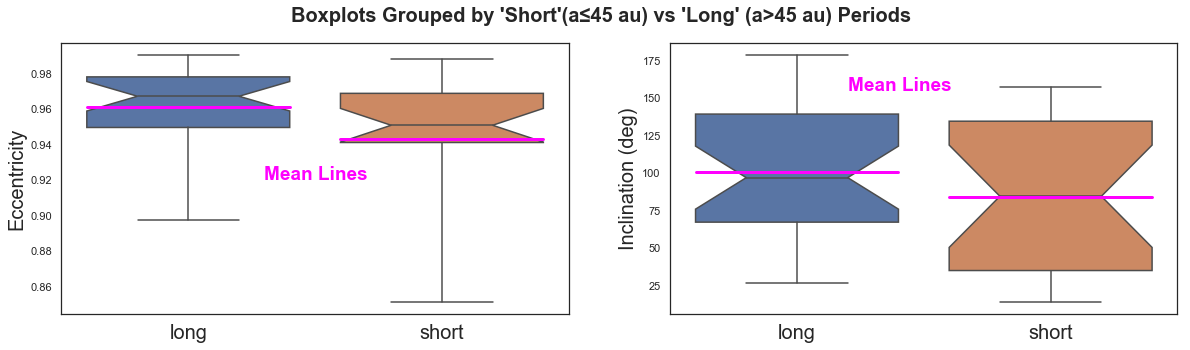

In [7]:
#Turning continuous variable (Semi-Major Axis) into categorical variable, period length (short vs long)
def filter_periods(row):
    """ 
    used to make a new column in our datarame that will store the
    categorial values ("short" or "long") for period length of each
    comet/row in our dataframe. The categories dividing according
    to which side of 45 (the dividing value) that their semi-major
    axis falls in; low or high ranges.
    
    INPUT: row = comet/row within the dataframe that is checked
    OUTPUT: val = the category value that the row/comet falls under
    """
    if row['semi-major axis (au)']<=45:
        val = "short"
    elif row['semi-major axis (au)']>45:
        val = "long"
    else:
        val="NaN"
    return val

#converting continuous variable, semi-major axis, into categorical, "short" vs "long" period, in new column
data['P_category'] = data.apply(filter_periods, axis=1)

fig5=plt.figure(figsize = (20,5)) #setting up the figure for adjacent subplots
fig5.suptitle("Boxplots Grouped by 'Short'(a≤45 au) vs 'Long' (a>45 au) Periods",fontsize=20,fontweight='bold') #main title

#First subplot: Eccentricity
axs5_1=fig5.add_subplot(1,2,1) # row, column, position
#boxplot for Eccentricity, with confidence interval notches, the "whickers" including the whole range 
                #(not treating any as outliers), show where the mean is & indicate with line (formatted/
                #styled according to my custom specifications)
axs5_1=sbn.boxplot(x="P_category",y='eccentricity',data=data,notch=True,ax=axs5_1,whis="range",
                  showmeans=True,meanline=True,meanprops=(dict(linestyle='-', linewidth=3, color='fuchsia')))
axs5_1.text(x=.3,y=0.92,s="Mean Lines",fontdict=(dict(color='fuchsia', weight='bold', size=19))) #label the mean lines
axs5_1.set_ylabel("Eccentricity",fontsize=20) #y-axis label
axs5_1.set_xlabel("") #redundent
axs5_1.set_xticklabels(axs5_1.get_xticklabels(), fontsize=20) #x-axis categories

#second subplot: Inclination
axs5_2=fig5.add_subplot(1,2,2)
bp_p2=sbn.boxplot(x="P_category",y='inclination (deg)',data=data,notch=True,ax=axs5_2,whis="range",
                  showmeans=True,meanline=True,meanprops=(dict(linestyle='-', linewidth=3, color='fuchsia')))
axs5_2.text(x=.2,y=155,s="Mean Lines",fontdict=(dict(color='fuchsia', weight='bold', size=19)))
axs5_2.set_ylabel("Inclination (deg)",fontsize=20)
axs5_2.set_xlabel("") #redundent
axs5_2.set_xticklabels(axs5_2.get_xticklabels(), fontsize=20) #x-axis categories

plt.show(fig5)

### Descriptive Statistics and Confidence Intervals (for short vs long period comet sub-sets)

In [8]:
#Separated dataframes for the sort and long period comets --> set up with a lot of 
#code that would be considered trivial for the project specifications, and so I exported 
#the two separate sets as csv files using pd.to_csv() function and then read them into here
#to keep the notebook clean, concise, and clear

#dataframe forms
t_short=pd.read_csv('short.csv') 
t_long=pd.read_csv('long.csv') 
#inclination data for SHORT and then LONG
i_s = t_short['inclination (deg)']
i_l = t_long['inclination (deg)']
#eccentricity data for SHORT and then LONG
e_s = t_short['eccentricity']
e_l = t_long['eccentricity']

#measures of center and confidence intervals:
#SHORT period - ECCENTRICITY
#bold label , ending concatenated part is to return to normal fontweight (non bold) for printing statistics
print('\033[1m' + '\tSHORT period - ECCENTRICITY'+'\033[0m')
print("Mean is: \t"+ "%.5f" %(np.nanmean(e_s))) #mean
print("Median is: \t"+ "%.5f" %(np.nanmedian(e_s))) #median
print("St. dev. is: \t"+ "%.5f" %(np.std(e_s))) #standard deviation
#confidence intervals
pop_95 = stats.t.interval(0.95, len(e_s)-1, loc=np.nanmean(e_s), scale=stats.sem(e_s, nan_policy='omit'))
print("95% conf interval:\t"+str(pop_95))
pop_99 = stats.t.interval(0.99, len(e_s)-1, loc=np.nanmean(e_s), scale=stats.sem(e_s, nan_policy='omit'))
print("99% conf interval:\t"+ str(pop_99))

#LONG period - ECCENTRICITY
#bold label , ending concatenated part is to return to normal fontweight (non bold) for printing statistics
print('\033[1m' + '\tLONG period - ECCENTRICITY'+'\033[0m')
print("Mean is: \t"+"%.5f" %(np.nanmean(e_l))) #mean
print("Median is: \t"+"%.5f" %(np.nanmedian(e_l))) #median
print("St. dev. is: \t"+"%.5f" %(np.std(e_l))) #standard deviation
#confidence intervals
pop_95 = stats.t.interval(0.95, len(e_l)-1, loc=np.nanmean(e_l), scale=stats.sem(e_l, nan_policy='omit'))
print("95% conf interval:\t"+str(pop_95))
pop_99 = stats.t.interval(0.99, len(e_l)-1, loc=np.nanmean(e_l), scale=stats.sem(e_l, nan_policy='omit'))
print("99% conf interval:\t"+str(pop_99))

#SHORT period - INCLINATION
#bold label , ending concatenated part is to return to normal fontweight (non bold) for printing statistics
print('\033[1m' + '\tSHORT period - INCLINATION'+'\033[0m')
print("Mean: \t"+"%.5f" %(np.nanmean(i_s))) #mean
print("Median is: \t"+"%.5f" %(np.nanmedian(i_s))) #median
print("St. dev. is: \t"+"%.5f" %(np.std(i_s))) #standard deviation
#confidence intervals
pop_95 = stats.t.interval(0.95, len(i_s)-1, loc=np.nanmean(i_s), scale=stats.sem(i_s, nan_policy='omit'))
print("95% conf interval:\t"+str(pop_95))
pop_99 = stats.t.interval(0.99, len(i_s)-1, loc=np.nanmean(i_s), scale=stats.sem(i_s, nan_policy='omit'))
print("99% conf interval:\t"+str(pop_99))

#LONG period - INCLINATION
#bold label , ending concatenated part is to return to normal fontweight (non bold) for printing statistics
print('\033[1m' + '\tLONG period - INCLINATION' + '\033[0m') 
print("The mean is: \t"+"%.5f" %(np.nanmean(i_l))) #mean
print("The median is: \t"+"%.5f" %(np.nanmedian(i_l))) #median
print("The st. dev. is: \t"+"%.5f" %(np.std(i_l))) #standard deviation
#confidence intervals
pop_95 = stats.t.interval(0.95, len(i_l)-1, loc=np.nanmean(i_l), scale=stats.sem(i_l, nan_policy='omit'))
print("95% conf interval:\t"+str(pop_95))
pop_99 = stats.t.interval(0.99, len(i_l)-1, loc=np.nanmean(i_l), scale=stats.sem(i_l, nan_policy='omit'))
print("99% conf interval:\t"+str(pop_99))

	SHORT period - ECCENTRICITY
Mean is: 	0.94304
Median is: 	0.95049
St. dev. is: 	0.03558
95% conf interval:	(0.9264395260163022, 0.9596327596979836)
99% conf interval:	(0.9203976766811934, 0.9656746090330923)
	LONG period - ECCENTRICITY
Mean is: 	0.96081
Median is: 	0.96681
St. dev. is: 	0.02429
95% conf interval:	(0.9514048027112321, 0.9702085765991124)
99% conf interval:	(0.9481237221568699, 0.9734896571534746)
	SHORT period - INCLINATION
Mean: 	84.03192
Median is: 	84.34110
St. dev. is: 	49.65811
95% conf interval:	(60.86960750360399, 107.19423249639601)
99% conf interval:	(52.43757562036123, 115.62626437963877)
	LONG period - INCLINATION
The mean is: 	100.36894
The median is: 	96.75817
The st. dev. is: 	43.40470
95% conf interval:	(83.56643457258436, 117.17144749638119)
99% conf interval:	(77.70267790911875, 123.0352041598468)


<Figure size 432x288 with 0 Axes>

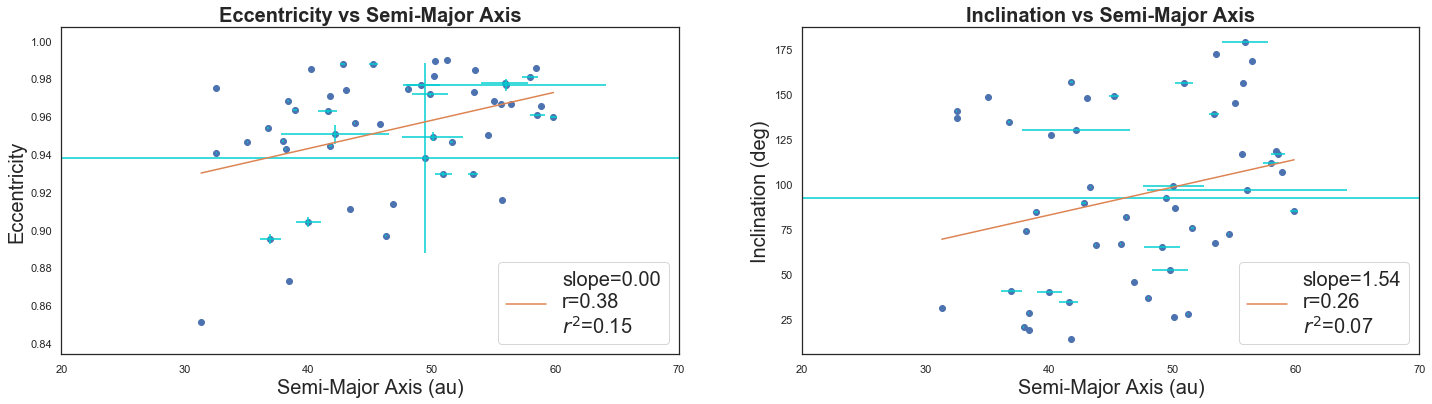

In [9]:
#original data for specified columns, converted to numpy arrays
sma = np.array(data['semi-major axis (au)'])
ecc = np.array(data['eccentricity'])
inc = np.array(data['inclination (deg)'])

#plotting original data with regression and quality of fit
fig0 = plt.figure()
fig0, p0 = plt.subplots(ncols = 2,figsize = (20,6))

p0[0].scatter(sma,ecc)
slope, intercept, r_value, p_value, std_err = stats.linregress(sma,ecc)
p0[0].plot([np.min(sma),np.max(sma)], [np.min(sma)*slope+intercept,np.max(sma)*slope+intercept],'C1', label = "slope="+"{:.2f}".format(slope)+"\nr="+"{:.2f}".format(r_value)+"\n$r^{2}$="+"{:.2f}".format(r_value**2))
p0[0].errorbar(x=sma,y=ecc,xerr=np.array(data['sigma_a'],),yerr=np.array(data['sigma_e']),ls='none',ecolor='darkturquoise')
p0[0].legend(loc='lower right',fontsize=20,frameon=True)
p0[0].set_title("Eccentricity vs Semi-Major Axis",fontweight="bold",size=20)
p0[0].set_xlabel("Semi-Major Axis (au)",size=20)
p0[0].set_ylabel("Eccentricity",size=20)
p0[0].set_xlim(20,70)

p0[1].scatter(sma,inc)
slope, intercept, r_value, p_value, std_err = stats.linregress(sma,np.array(data['inclination (deg)']))
p0[1].plot([np.min(sma),np.max(sma)], [np.min(sma)*slope+intercept,np.max(sma)*slope+intercept],'C1', label = "slope="+"{:.2f}".format(slope)+"\nr="+"{:.2f}".format(r_value)+"\n$r^{2}$="+"{:.2f}".format(r_value**2))
p0[1].errorbar(x=sma,y=inc,xerr=np.array(data['sigma_a']),yerr=np.array(data['sigma_i']),ls='none',ecolor='darkturquoise')
p0[1].legend(loc='lower right',fontsize=20,frameon=True)
p0[1].set_title("Inclination vs Semi-Major Axis",fontweight="bold",size=20)
p0[1].set_xlabel("Semi-Major Axis (au)",size=20)
p0[1].set_ylabel("Inclination (deg)",size=20)
p0[1].set_xlim(20,70)

fig0.tight_layout() #prevent overlaps of subplots data and labels
fig0.subplots_adjust(top=0.88) #so that title does not overlap over subplots
fig0.subplots_adjust(wspace=0.2)

### Hypothesis Testing
I will conduct a 2 sample Mood’s Median Test (non-parametric test to determine whether the median of two independent samples are equal) for the difference of eccentricity medians between 'Short'(a≤45 au) and 'Long' (a>45 au) period comets passing through our solar system.
- Null hypothesis: There is NO significant difference in the (a) eccentricity and (b) Inclination medians of 'Short'(a≤45 au) and 'Long' (a>45 au) period comets passing through our solar system.
- Alternative hypothesis: There IS a significant difference in the (a) eccentricity and (b) Inclination medians of 'Short'(a≤45 au) and 'Long' (a>45 au) period comets passing through our solar system.

In [10]:
def filter_value(dataframe, columnname, value):
    """
    filters/groups a dataframe based on values within a specified column.
    INPUT:  dataframe - Pandas data frame that will be parsed/filtered
            columnname - name of the column used for filtering
            value - filters rows with the given value
    Output: Pandas DataFrame containing only the rows that had value for columnname
    """
    return dataframe[dataframe[columnname]==value ]

#short period sample - eccentricity data
s_short=filter_value(data,'P_category','short') #"short" period comets
s_long=filter_value(data,'P_category','long') #"long" period comets
#short and long period samples' eccentricity data
e_short=s_short['eccentricity']
e_long=s_long['eccentricity'] #"long" period comets that have short periods
#short and long period samples' inclination data
i_short=s_short['inclination (deg)']
i_long=s_long['inclination (deg)']

#printing test results
print("Mood’s Median Test for difference in ECCENTRICITY medians")
e_stat,e_pval,e_totMed,e_tab= stats.median_test(e_short,e_long) 
    #returns test statistc, p-value, grand median, contingency table
print("\ttest statistic = \t"+str(e_stat)+"\n\tp-value = \t\t"+str(e_pval))

print("Mood’s Median Test for difference in INCLINATION medians")
i_stat,i_pval,i_totMed,i_tab= stats.median_test(i_short,i_long) 
    #returns test statistc, p-value, grand median, contingency table
print("\ttest statistic = \t"+str(i_stat)+"\n\tp-value = \t\t"+str(i_pval))

Mood’s Median Test for difference in ECCENTRICITY medians
	test statistic = 	1.3136288998357966
	p-value = 		0.2517386729294735
Mood’s Median Test for difference in INCLINATION medians
	test statistic = 	0.32840722495894914
	p-value = 		0.5665984802832496



### Interpretation of Results:
* If p-value < α then the medians of the populations from which the two samples are derived are unequal; otherwise they are equal

RESULTS:
    Mood’s Median Test for difference in ECCENTRICITY medians

        Pearson’s chi-squared statistic = 	1.3136288998357966
        p-value = 		0.2517386729294735
p-value > 0.05, 

Since the P-value (0.252) is greater than the significance level (0.05), we CANNOT reject the NULL hypothesis of equal Eccentricity medians.

    Mood’s Median Test for difference in INCLINATION medians

        Pearson’s chi-squared statistic = 	0.32840722495894914
        p-value = 		0.5665984802832496
Since the P-value (0.567) is greater than the significance level (0.05), we CANNOT reject the NULL hypothesis of equal Inclination medians.

## Monte Carlo Simulation

In [11]:
def dataSim(xs,ys,n,points=30):
    '''
    Draws arbitrary number (n) of "points" point random realizations from distribution,
    "ys" vs "xs", and outputs a list of best fit slopes and corr coeff for each realization
    INPUT: xs and ys = data, n = arbitrary number, points = # of values for each realization
            plotRealizations = boolean for if want to plot the realizations
    OUTPUT: slopes = list of best fit slopes for each of the realizations
            rs = list of corr coeff for each of the realizations
            data = the data of the realizations generated/simulated
    '''   
    fit = np.zeros((n,2))
    data1 = np.random.multivariate_normal([np.mean(xs),np.mean(ys)],np.cov(xs,ys),(n,points))
    for i in range(n):
        res = stats.linregress(data1[i,:,0],data1[i,:,1])
        fit[i][0] = res[0]
        fit[i][1] = res[2]
    slopes = fit[:][0]
    rs = fit[:][1]

    return slopes,rs,data1


sma = np.array(data['semi-major axis (au)'])
ecc = np.array(data['eccentricity'])
tp = np.array(data['TP (TDB)'])
inc = np.array(data['inclination (deg)'])

#Running MC simulation:
n=1000
points=30
s1,r1,d1 = dataSim(xs=sma,ys=ecc,n=n,points=points) #simulation for eccentricity vs semi-major axis realizations
s2,r2,d2 = dataSim(xs=sma,ys=tp,n=n,points=points) #simulation for TP vs semi-major axis realizations
s3,r3,d3 = dataSim(xs=sma,ys=inc,n=n,points=points) #simulation for inclination vs semi-major axis realizations

### Model Fits with reported "quality of fit" metric
- Fitting linear models (**linear regression** with linregress()) and calculating the **r<sup>2</sup>** metric for each realization/sample within simulated samples


 **r<sup>2</sup>** or also called the coefficient of determination provides a “goodness of fit” measure for the predictions to the observations. This is a value between 0 and 1 for no-fit and perfect fit respectively

<Figure size 432x288 with 0 Axes>

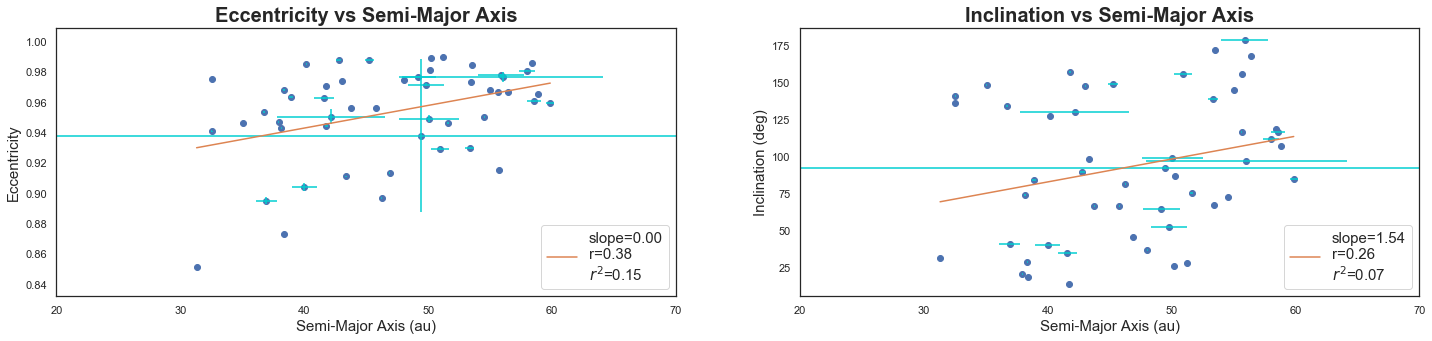

In [12]:
def plotSamples(data):
    """
    INPUT: data = realizations being plotted
    OUTPUT: Plotted realizations as subplots 
            ***Thisfunction assumes n>=8, and so plots only the first 12 realizaitons to avoid
            cluttering the display and wasting data-ink with redundancy"""
    #subplot dimensions: x=2 and y=4 --> See *** note
    #fig resolution or size: figX and figY
    figX=20
    figY=8
    #setting data x-values and y-values
    x=data[:,:,0]
    y=data[:,:,1]
    #setting min and max
    mini = np.min(data[:,:,0])
    maxi = np.max(data[:,:,0])
    fig,axes=plt.subplots(2, 4, figsize=(figX,figY),sharex=True,sharey=True)
    for i in range(2):
        for j in range(4):
            axes[i][j].scatter(data[4*i+j,:,0],data[4*i+j,:,1])           
            slope, intercept, r_value, p_value, std_err = stats.linregress(data[4*i+j,:,0],data[4*i+j,:,1])
            axes[i][j].plot([mini,maxi], [mini*slope+intercept,maxi*slope+intercept],'C1', label = "slope="+"{:.4f}".format(slope)+"\nr="+"{:.2f}".format(r_value)+"\n$r^{2}$="+"{:.2f}".format(r_value**2))
            axes[i][j].legend(loc='upper left')
            #axes[i][j].set_title("Realization "+str(i)+","+str(j),fontweight="bold",size=15)

            
#original data for specified columns, converted to numpy arrays
sma = np.array(data['semi-major axis (au)'])
ecc = np.array(data['eccentricity'])
tp = np.array(data['TP (TDB)'])
inc = np.array(data['inclination (deg)'])

#plotting original data with regression and quality of fit
fig0 = plt.figure()
fig0, p0 = plt.subplots(ncols = 2,figsize = (20,5))

p0[0].scatter(sma,ecc)
slope, intercept, r_value, p_value, std_err = stats.linregress(sma,ecc)
p0[0].plot([np.min(sma),np.max(sma)], [np.min(sma)*slope+intercept,np.max(sma)*slope+intercept],'C1', label = "slope="+"{:.2f}".format(slope)+"\nr="+"{:.2f}".format(r_value)+"\n$r^{2}$="+"{:.2f}".format(r_value**2))
p0[0].errorbar(x=sma,y=ecc,xerr=np.array(data['sigma_a'],),yerr=np.array(data['sigma_e']),ls='none',ecolor='darkturquoise')
p0[0].legend(loc='lower right',fontsize=15,frameon=True)
p0[0].set_title("Eccentricity vs Semi-Major Axis",fontweight="bold",size=20)
p0[0].set_xlabel("Semi-Major Axis (au)",size=15)
p0[0].set_ylabel("Eccentricity",size=15)
p0[0].set_xlim(20,70)

p0[1].scatter(sma,inc)
slope, intercept, r_value, p_value, std_err = stats.linregress(sma,np.array(data['inclination (deg)']))
p0[1].plot([np.min(sma),np.max(sma)], [np.min(sma)*slope+intercept,np.max(sma)*slope+intercept],'C1', label = "slope="+"{:.2f}".format(slope)+"\nr="+"{:.2f}".format(r_value)+"\n$r^{2}$="+"{:.2f}".format(r_value**2))
p0[1].errorbar(x=sma,y=inc,xerr=np.array(data['sigma_a']),yerr=np.array(data['sigma_i']),ls='none',ecolor='darkturquoise')
p0[1].legend(loc='lower right',fontsize=15,frameon=True)
p0[1].set_title("Inclination vs Semi-Major Axis",fontweight="bold",size=20)
p0[1].set_xlabel("Semi-Major Axis (au)",size=15)
p0[1].set_ylabel("Inclination (deg)",size=15)
p0[1].set_xlim(20,70)

fig0.tight_layout() #prevent overlaps of subplots data and labels
fig0.subplots_adjust(top=0.88) #so that title does not overlap over subplots
fig0.subplots_adjust(wspace=0.2)

		SIMULATING 1000 RANDOM 30 POINT REALIZAITIONS
e vs a realizations (N=30 each): 	Average R-squared = 0.07609740293336141
TP vs a realizations (N=30 each): 	Average R-squared = 0.000688941847750761
i vs a realizations: (N=30 each):	Average R-squared = 0.11565174384163066


**<p style="text-align: center;">....... For each simulation, only 8 of the realizatons are shown below .......</p>**

PLOTTED REALIZATIONS:


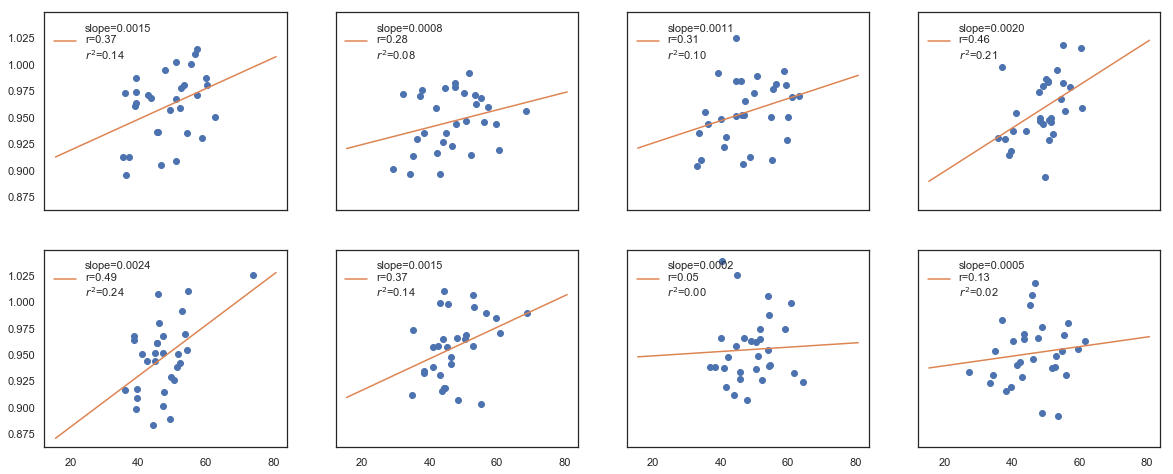

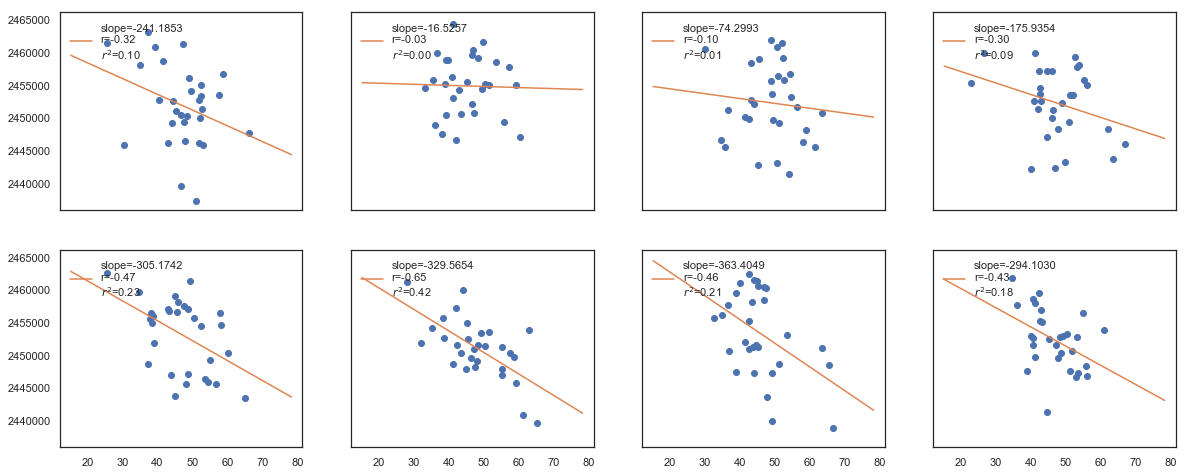

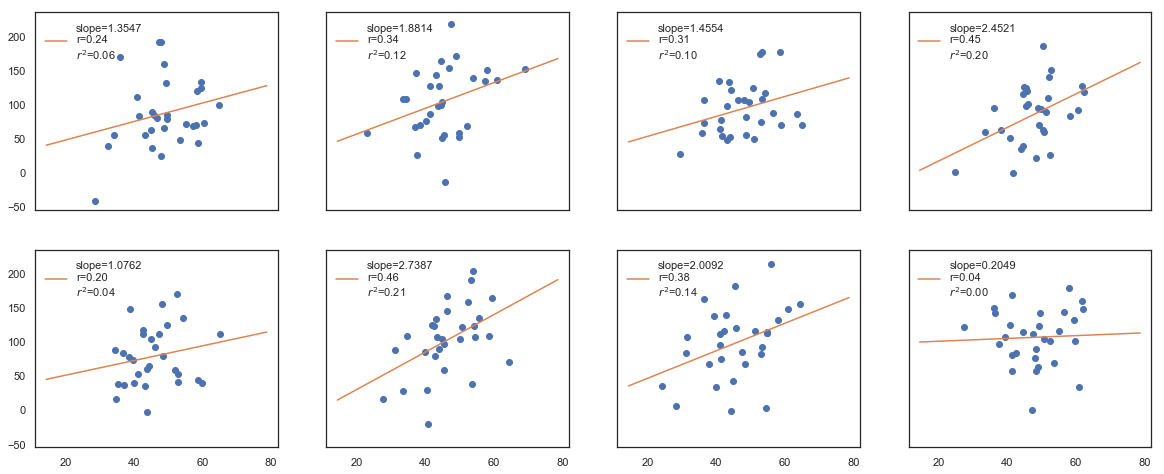

In [51]:
print("\t\tSIMULATING "+str(n)+" RANDOM "+str(points)+" POINT REALIZAITIONS")
ec_R2 = r1[1]**2
inc_R2 = r3[1]**2
TP_R2 = r2[1]**2
print("e vs a realizations (N=30 each): \tAverage R-squared = "+str(ec_R2))
print("TP vs a realizations (N=30 each): \tAverage R-squared = "+str(TP_R2))
print("i vs a realizations: (N=30 each):\tAverage R-squared = "+str(inc_R2))
display(Markdown('**<p style="text-align: center;">....... For each simulation, only 8 of the realizatons are shown below .......</p>**'))

print("PLOTTED REALIZATIONS:")
plotSamples(d1)
plotSamples(d2)
plotSamples(d3)

# Distributions from Realizations

In [14]:
#format: simulationData [ sample_# ; entries_at_index_of_each_sample ; 0_for_x or 1_for_y ]

print("\tAVERAGES OF SAMPLE MEDIANS:")

#means of eccentricity vs semi-major axis realizations:
sumy=0
sumx=0
ecc_meds = np.zeros(n)
sma1_meds = np.zeros(n)
for i in range(n):
    sma1_meds[i] = np.median(d1[i,:,0])
    ecc_meds[i] = np.median(d1[i,:,1])
    sumx = sumx + np.median(d1[i,:,0])
    sumy = sumy + np.median(d1[i,:,1])
ecc_avg = sumy/n
sma1_avg = sumx/n
print("Eccentricity: \t\t\t"+str(ecc_avg))
print("semi-major axis 1: \t\t"+str(sma1_avg))


sumy=0
sumx=0
tp_meds = np.zeros(n)
sma2_meds = np.zeros(n)
for i in range(n):
    sma2_meds[i] = np.median(d2[i,:,0])
    tp_meds[i] = np.median(d2[i,:,1])
    sumx = sumx + np.median(d2[i,:,0])
    sumy = sumy + np.median(d2[i,:,1])
tp_avg=sumy/n
sma2_avg = sumx/n
print("Time of Perihelion Passage: \t"+str(tp_avg))
print("semi-major axis 2: \t\t"+str(sma2_avg))

sumy=0
sumx=0
inc_meds = np.zeros(n)
sma3_meds = np.zeros(n)
for i in range(n):
    sma3_meds[i] = np.median(d3[i,:,0])
    inc_meds[i] = np.median(d3[i,:,1])
    sumx = sumx + np.median(d3[i,:,0])
    sumy = sumy + np.median(d3[i,:,1])
inc_avg = sumy/n
sma3_avg = sumx/n
print("Inlination: \t\t\t"+str(inc_avg))
print("semi-major axis 3: \t\t"+str(sma3_avg))


	AVERAGES OF SAMPLE MEDIANS:
Eccentricity: 			0.9534473657066797
semi-major axis 1: 		46.94548921219585
Time of Perihelion Passage: 	2452443.56272519
semi-major axis 2: 		47.00478684724939
Inlination: 			93.92032369202367
semi-major axis 3: 		47.004276319471124


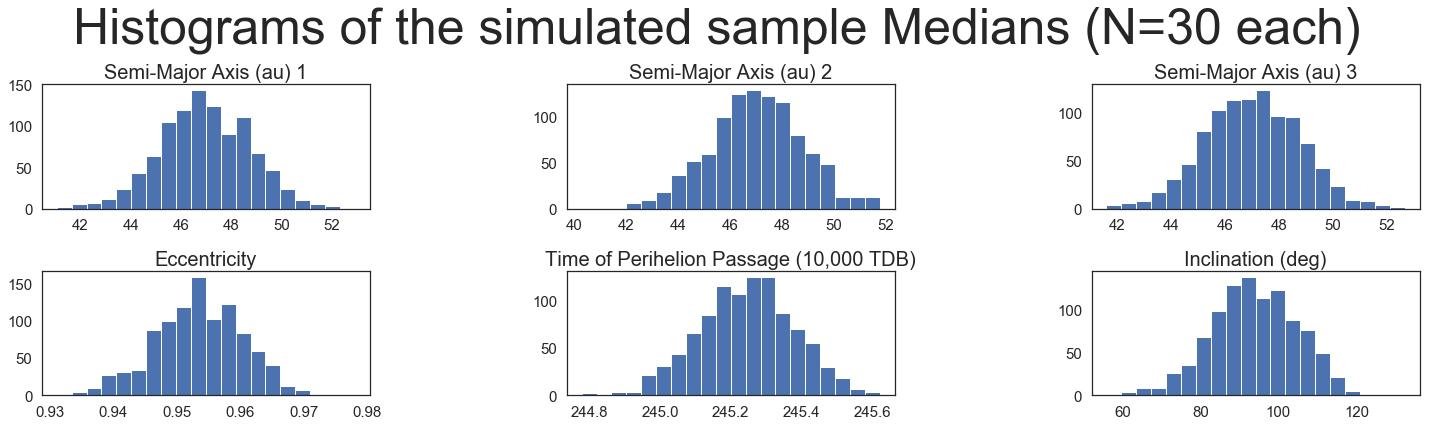

In [15]:
#Histograms (Sampling Distirbutions) from Realizaitions
    #slopes, means/medians, correlation coefficients
# FORMAT: The sma of each property's samples are on top, with corresponding property samples below

dm1, m1 = plt.subplots(2,3,figsize=(20,6),sharex=False,sharey=False)
dm1.suptitle("Histograms of the simulated sample Medians (N=30 each)",fontsize=50, ha='center') #main title

#Plotting the data
lab1 = ["Semi-Major Axis (au) 1","Semi-Major Axis (au) 2","Semi-Major Axis (au) 3"]
lab2 = ["Eccentricity","Time of Perihelion Passage (10,000 TDB)","Inclination (deg)"]
m_row1 = [sma1_meds,sma2_meds,sma3_meds]
m_row2 = [ecc_meds,(tp_meds/10000),inc_meds]
counter = 0;

for i in range(0,3):
    m1[0][i].hist(m_row1[counter],bins=20)
    m1[0][i].set_title(lab1[counter],fontsize=20, ha='center')
    m1[0][i].tick_params(labelsize=15)
    counter = counter+1
counter=0
for j in range(0,3):
    m1[1][j].hist(m_row2[counter],bins=20)
    m1[1][j].set_title(lab2[counter],fontsize=20, ha='center')
    m1[1][j].tick_params(labelsize=15)
    counter = counter+1
dm1.tight_layout() #prevent overlaps of subplots data and labels
dm1.subplots_adjust(top=0.8) #so that title does not overlap over subplots
dm1.subplots_adjust(wspace=0.6, hspace=0.5)

## Correlation Tests of Semi-Major Axis with (1) Eccentricity and (2) Inclination
***<p style="text-align: center;">CORRELATION TESTS done between the variables: </p>***

In [16]:
#correlation test and prints out all other data for given dataframe and test type
def correlations(variable1,variable2,testtype, seeMatrices=False):
    if seeMatrices==True:
        #Print covariance matrix and correlation matrix
        print('\t\tCovariance matrix:\n\t\t\t',str(np.cov(variable1,variable2)[0]),'\n\t\t\t',str(np.cov(variable1,variable2)[1]))
        print('\t\tCorrelation matrix:\n\t\t\t',str(np.corrcoef(variable1,variable2)[0]),'\n\t\t\t',str(np.corrcoef(variable1,variable2)[1]))
    #Pearson correlation test
    if testtype=='Pearson':
        print('\t\tPearsonResult: '+str(stats.pearsonr(variable1,variable2)))
    #Spearman correlation test results
    elif testtype=='Spearman':
        print('\t\t'+str(stats.spearmanr(variable1,variable2)))
    #Kendall tau correlation test results
    elif testtype=='Kendalltau':
        print('\t\t'+str(stats.kendalltau(variable1,variable2)))

#Correlation tests for Eccentricity and Semi-Major Axis data
display(Markdown('#### Correlation tests for Eccentricity and Semi-Major Axis data'))
correlations(data['semi-major axis (au)'],data['eccentricity'],'Pearson',True) #pearson
correlations(data['semi-major axis (au)'],data['eccentricity'],'Spearman') #spearman
correlations(data['semi-major axis (au)'],data['eccentricity'],'Kendalltau') #kendall tau
#Correlation tests for Inclination and Semi-Major Axis data
display(Markdown('#### Correlation tests for Inclination and Semi-Major Axis data'))
correlations(data['semi-major axis (au)'],data['inclination (deg)'],'Pearson',True) #pearson
correlations(data['semi-major axis (au)'],data['inclination (deg)'],'Spearman') #spearman
correlations(data['semi-major axis (au)'],data['inclination (deg)'],'Kendalltau') #kendall tau
#Correlation tests for Time of Perhelion Passage and Semi-Major Axis data
#display(Markdown('#### Correlation tests for Time of Perihelion Passage and Semi-Major Axis data'))
#correlations(data['semi-major axis (au)'],data['TP (TDB)'],'Pearson',True) #pearson
#correlations(data['semi-major axis (au)'],data['TP (TDB)'],'Spearman') #spearman
#correlations(data['semi-major axis (au)'],data['TP (TDB)'],'Kendalltau') #kendall tau

#### Correlation tests for Eccentricity and Semi-Major Axis data

		Covariance matrix:
			 [63.08880012  0.09428805] 
			 [0.09428805 0.0009702 ]
		Correlation matrix:
			 [1.         0.38110954] 
			 [0.38110954 1.        ]
		PearsonResult: (0.3811095356139044, 0.006322258447553609)
		SpearmanrResult(correlation=0.3406002400960384, pvalue=0.015505691198651661)
		KendalltauResult(correlation=0.2310204081632653, pvalue=0.017920592898864003)


#### Correlation tests for Inclination and Semi-Major Axis data

		Covariance matrix:
			 [63.08880012 97.38817819] 
			 [  97.38817819 2238.17177255]
		Correlation matrix:
			 [1.         0.25916921] 
			 [0.25916921 1.        ]
		PearsonResult: (0.25916920750731887, 0.06914921127450022)
		SpearmanrResult(correlation=0.2837454981992797, pvalue=0.04583746679749135)
		KendalltauResult(correlation=0.19346938775510203, pvalue=0.04742651745649727)
